# Discord Network Analysis of DPS Season 5 Server - Code Notebook

In this notebook I will be creating node and edge lists that can be imported into Gephi, sentiment analysis, wordclouds, and BERTopic modelling.

## Imports

The necessary libraries will be imported.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import networkx as nx
import pandas as pd
from transformers import pipeline
import spacy
import json
import os

## Loading Messages

In [2]:
#Flattens the data so that we can access things such as like count from public metrics
def flatten_nested_dicts(df):
    dicts = df.to_dict(orient='records')
    flattened = pd.json_normalize(dicts)
    return flattened

In [3]:
messages = pd.DataFrame()

In [4]:
path_to_json = 'S5 JSON/'

for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
  with open(path_to_json + file_name, encoding="utf8") as json_file:
    channel_json = json.load(json_file)
    
    #Turns our json file into a dataframe
    channelinfo = pd.DataFrame(channel_json["channel"], index=[0])
    channelmessages = pd.DataFrame(channel_json["messages"])
    channelmessages['channelName'] = channelinfo["name"].iloc[0]

    messages = pd.concat([messages, channelmessages], ignore_index=True)

In [5]:
messages

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,author,attachments,embeds,stickers,reactions,mentions,channelName,reference,interaction
0,884146797147226162,Default,2021-09-05T18:43:43.093+00:00,None,None,False,Use this channel to post runs that you would l...,"{'id': '105785405089009664', 'name': 'abe.5446...",[],[],[],[],[],job-board,NaN,NaN
1,884147378163159130,Default,2021-09-05T18:46:01.618+00:00,2021-09-05T19:05:55.706+00:00,None,False,"To be clear, anyone can suggest jobs. Please c...","{'id': '105785405089009664', 'name': 'abe.5446...",[],[],[],[],[],job-board,NaN,NaN
2,884148174267244544,Default,2021-09-05T18:49:11.424+00:00,None,None,False,Objective: Find and disable the AI,"{'id': '371009505841905687', 'name': 'Morshu',...",[],[],[],[],[],job-board,NaN,NaN
3,884148540287377449,Default,2021-09-05T18:50:38.69+00:00,None,None,False,Objective: Recover the coffee machine for medi...,"{'id': '200837181500162048', 'name': 'retromac...",[],[],[],[],[],job-board,NaN,NaN
4,884152011350745138,Default,2021-09-05T19:04:26.256+00:00,None,None,False,@Runner \nORG GroundCom Objectives\nHIGH RISK ...,"{'id': '355184968583872515', 'name': 'TheMaske...",[],[],[],[],[],job-board,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327781,840638451736772679,Default,2021-05-08T17:17:05.201+00:00,2021-05-08T18:06:26.886+00:00,None,False,**Notable Features: **\nAlways one of the most...,"{'id': '67806201148084224', 'name': 'jba', 'di...",[],[],[],[],[],terra-nova-info,NaN,NaN
327782,840638569595928576,Default,2021-05-08T17:17:33.301+00:00,None,None,False,*Pictured: The sun rises over Salta*,"{'id': '67806201148084224', 'name': 'jba', 'di...",[],[],[],[],[],terra-nova-info,NaN,NaN
327783,840638610281332756,Default,2021-05-08T17:17:43.001+00:00,None,None,False,,"{'id': '67806201148084224', 'name': 'jba', 'di...","[{'id': '840638607059845130', 'url': 'https://...",[],[],[],[],terra-nova-info,NaN,NaN
327784,870069073793400922,Default,2021-07-28T22:23:52.294+00:00,None,None,False,https://media.discordapp.net/attachments/83815...,"{'id': '67806201148084224', 'name': 'jba', 'di...",[],"[{'title': '', 'url': 'https://media.discordap...",[],"[{'emoji': {'id': '', 'name': '👍', 'code': 'th...",[],terra-nova-info,NaN,NaN


In [6]:
#Flattens our df
messages = flatten_nested_dicts(messages)
messages.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327786 entries, 0 to 327785
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              327786 non-null  object 
 1   type                            327786 non-null  object 
 2   timestamp                       327786 non-null  object 
 3   timestampEdited                 13007 non-null   object 
 4   callEndedTimestamp              0 non-null       object 
 5   isPinned                        327786 non-null  bool   
 6   content                         327786 non-null  object 
 7   attachments                     327786 non-null  object 
 8   embeds                          327786 non-null  object 
 9   stickers                        327786 non-null  object 
 10  reactions                       327786 non-null  object 
 11  mentions                        327786 non-null  object 
 12  channelName     

In [7]:
messages.to_csv("s5.csv", encoding='utf-8', index=False)
#messages.to_json("s5.json")

In [8]:
messages

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,stickers,...,reference.guildId,interaction.id,interaction.name,interaction.user.id,interaction.user.name,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl
0,884146797147226162,Default,2021-09-05T18:43:43.093+00:00,None,None,False,Use this channel to post runs that you would l...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,884147378163159130,Default,2021-09-05T18:46:01.618+00:00,2021-09-05T19:05:55.706+00:00,None,False,"To be clear, anyone can suggest jobs. Please c...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,884148174267244544,Default,2021-09-05T18:49:11.424+00:00,None,None,False,Objective: Find and disable the AI,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,884148540287377449,Default,2021-09-05T18:50:38.69+00:00,None,None,False,Objective: Recover the coffee machine for medi...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,884152011350745138,Default,2021-09-05T19:04:26.256+00:00,None,None,False,@Runner \nORG GroundCom Objectives\nHIGH RISK ...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327781,840638451736772679,Default,2021-05-08T17:17:05.201+00:00,2021-05-08T18:06:26.886+00:00,None,False,**Notable Features: **\nAlways one of the most...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327782,840638569595928576,Default,2021-05-08T17:17:33.301+00:00,None,None,False,*Pictured: The sun rises over Salta*,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327783,840638610281332756,Default,2021-05-08T17:17:43.001+00:00,None,None,False,,"[{'id': '840638607059845130', 'url': 'https://...",[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327784,870069073793400922,Default,2021-07-28T22:23:52.294+00:00,None,None,False,https://media.discordapp.net/attachments/83815...,[],"[{'title': '', 'url': 'https://media.discordap...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Conversation Finder

In [9]:
from datetime import timedelta

In [10]:
# Convert timestamp column to datetime
messages['timestamp'] = pd.to_datetime(messages['timestamp'])

In [11]:
from tqdm import tqdm

# Initialize conversation counter and conversation ID
conversation_counter = 0
conversation_id = 1

# Create a dictionary to map message IDs to conversation IDs
conversation_mapping = {}

# Create a new column for conversation ID
messages['conversation'] = 0

# Get the total number of rows in the DataFrame
total_rows = len(messages)

# Create a progress bar
progress_bar = tqdm(total=total_rows, desc='Processing', unit='row')

# Iterate over each row in the DataFrame
for index, row in messages.iterrows():
    # Update the progress bar
    progress_bar.update(1)

    # Get the timestamp of the current row
    current_timestamp = row['timestamp']
    # Get the reference message ID of the current row
    reference_message_id = row['reference.messageId']
    
    # Check if the current row is a reply to another message
    if pd.notnull(reference_message_id):
        # Check if the referenced message ID exists in the conversation mapping
        if reference_message_id in conversation_mapping:
            # Get the conversation ID of the referenced message
            conversation_id = conversation_mapping[reference_message_id]
            
            # Assign the same conversation ID to the current row
            messages.at[index, 'conversation'] = conversation_id
    
    # Check if the current row is within 15 minutes of the last message
    if index > 0:
        last_timestamp = messages.at[index - 1, 'timestamp']
        time_difference = current_timestamp - last_timestamp
        if time_difference <= timedelta(minutes=15):
            # Assign the same conversation ID as the previous message
            messages.at[index, 'conversation'] = conversation_id
        else:
            # Start a new conversation and update the conversation ID
            conversation_counter += 1
            conversation_id = conversation_counter
            messages.at[index, 'conversation'] = conversation_id

    # Update the conversation mapping with the current message ID and conversation ID
    conversation_mapping[row['id']] = conversation_id

# Close the progress bar
progress_bar.close()

Processing: 100%|██████████| 327786/327786 [00:40<00:00, 8115.92row/s]


In [12]:
messages[["content","channelName","conversation"]]

,content,channelName,conversation
0,Use this channel to post runs that you would l...,job-board,0
1,"To be clear, anyone can suggest jobs. Please c...",job-board,1
2,Objective: Find and disable the AI,job-board,1
3,Objective: Recover the coffee machine for medi...,job-board,1
4,@Runner \nORG GroundCom Objectives\nHIGH RISK ...,job-board,1
...,...,...,...
327781,**Notable Features: **\nAlways one of the most...,terra-nova-info,18481
327782,*Pictured: The sun rises over Salta*,terra-nova-info,18481
327783,,terra-nova-info,18481
327784,https://media.discordapp.net/attachments/83815...,terra-nova-info,18482


In [13]:
messages.to_csv("s5_conversations.csv", encoding='utf-8', index=False)

In [14]:
#messages.to_json("s5_conversations.json")

### Creating an Edge and Node List

In [15]:
messages.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327786 entries, 0 to 327785
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   id                              327786 non-null  object             
 1   type                            327786 non-null  object             
 2   timestamp                       327786 non-null  datetime64[ns, UTC]
 3   timestampEdited                 13007 non-null   object             
 4   callEndedTimestamp              0 non-null       object             
 5   isPinned                        327786 non-null  bool               
 6   content                         327786 non-null  object             
 7   attachments                     327786 non-null  object             
 8   embeds                          327786 non-null  object             
 9   stickers                        327786 non-null  object             
 

In [16]:
messages["author.name"]

0                abe.5446
1                abe.5446
2                  Morshu
3               retromach
4         TheMaskedReader
               ...       
327781                jba
327782                jba
327783                jba
327784                jba
327785                jba
Name: author.name, Length: 327786, dtype: object

In [17]:
#Gets just the author_id and referenced tweets columns from the tweets
subset = messages[['author.id','conversation']].dropna()
subset

,author.id,conversation
0,105785405089009664,0
1,105785405089009664,1
2,371009505841905687,1
3,200837181500162048,1
4,355184968583872515,1
...,...,...
327781,67806201148084224,18481
327782,67806201148084224,18481
327783,67806201148084224,18481
327784,67806201148084224,18482


In [18]:
# Drop duplicate rows
subset = subset.drop_duplicates()

# Group by conversation and author name
grouped = subset.groupby(['conversation', 'author.id']).size().reset_index()

# Create edge list
edge_list = []

# Iterate over each conversation
for conversation_id, group in grouped.groupby('conversation'):
    authors = group['author.id'].tolist()
    
    # Create edges between authors in the same conversation
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            edge_list.append((authors[i], authors[j]))

In [19]:
edge_data = pd.DataFrame(edge_list, columns=['Source', 'Target'])

In [20]:
edge_data['weight'] = 1
edge_data

,Source,Target,weight
0,105785405089009664,200837181500162048,1
1,105785405089009664,316619023880159232,1
2,105785405089009664,355184968583872515,1
3,105785405089009664,356997998242430978,1
4,105785405089009664,371009505841905687,1
...,...,...,...
138190,763249988830232598,784217207852892200,1
138191,183682701532987392,212392219456307210,1
138192,183682701532987392,212392219456307210,1
138193,183682701532987392,67806201148084224,1


In [21]:
edge_data.to_csv('s5_edge_list.csv',index=False)

In [22]:
author_ids = messages['author.id']
author_names = messages['author.name']
author_color = messages['author.color']
author_nickname = messages['author.nickname']
author_bot = messages['author.isBot']

# Create a DataFrame for the node list
node_df = pd.DataFrame({'ID': list(author_ids), 'Label': list(author_names), 'colour': list(author_color), 'nickname': list(author_nickname), 'bot': list(author_bot)})
node_df = node_df.drop_duplicates()
node_df

,ID,Label,colour,nickname,bot
0,105785405089009664,abe.5446,#1ABC9C,Abe,False
2,371009505841905687,Morshu,#586ACE,Lone Survivor Howard Y. Long,False
3,200837181500162048,retromach,#F1C40F,retromach,False
4,355184968583872515,TheMaskedReader,#3498DB,Grand Marshall Lars Marill,False
5,316619023880159232,dapocalypse,None,jackie :)),False
...,...,...,...,...,...
317937,862335707488976916,Cyber Pulse,None,Cyber Pulse,True
319965,861666287059337257,GAME_MASTER,None,GAME_MASTER,True
319977,861666289393860628,Commissioner Rolland,None,Commissioner Rolland,True
320070,861666289393860628,Chairman Mayeda Tatsuya,None,Chairman Mayeda Tatsuya,True


In [23]:
# Save the node list as a CSV file compatible with Gephi
node_df.to_csv('s5_node_list.csv', index=False)

## NetworkX, Netwulf Visualisation

In [24]:
from netwulf import visualize

In [25]:
# Some helpful functions

# Sets the size attribute of our graph to whatever scores are passed in - netwulf uses the size attribute to determine node size.
def size_by(G,scores):
    nx.set_node_attributes(G,scores, name='size')
    return G

# netwulf uses the group attribute to determine node color.
def color_by(G, assignment):
    nx.set_node_attributes(G, assignment, name='group')
    return G

def top_n(scores, n=10):
    return pd.Series(scores).sort_values(ascending=False).head(n)

In [26]:
# Some filtering functions

def filter_by_k_core(G, k):
     return nx.k_core(G, k=k)

def filter_by_degree(G, minimum_degree):
    scores = G.degree()
    to_keep = [node for node,degree in scores if degree >= minimum_degree]
    return G.subgraph(to_keep)

def filter_by_giant_component(G):
    components = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(components[0])

In [27]:
# Let's standardise how we generate community labels and measure modularity

def find_communities(G, weight='weight'):
    comms = nx.algorithms.community.louvain_communities(G,weight=weight)
    n_communities = len(comms)
    modularity = nx.algorithms.community.modularity(G,comms,weight='weight')
    assignments = {}
    for com_id, members in enumerate(comms):
        for node in members:
            assignments[node] = com_id
    return assignments, n_communities, modularity

In [28]:
messages_G = nx.from_pandas_edgelist(edge_data, create_using=nx.Graph, source='Source',target='Target')

In [29]:
comms, n_communities, modularity = find_communities(messages_G)

In [30]:
filtered = filter_by_degree(messages_G, 2)
filtered = filter_by_giant_component(filtered)

comms, n_communities, modularity = find_communities(filtered, weight='weight')
print(f'Our network has {n_communities} communities, with a modularity score of {modularity}')

Our network has 6 communities, with a modularity score of 0.1026917399532627


In [31]:
node_df

,ID,Label,colour,nickname,bot
0,105785405089009664,abe.5446,#1ABC9C,Abe,False
2,371009505841905687,Morshu,#586ACE,Lone Survivor Howard Y. Long,False
3,200837181500162048,retromach,#F1C40F,retromach,False
4,355184968583872515,TheMaskedReader,#3498DB,Grand Marshall Lars Marill,False
5,316619023880159232,dapocalypse,None,jackie :)),False
...,...,...,...,...,...
317937,862335707488976916,Cyber Pulse,None,Cyber Pulse,True
319965,861666287059337257,GAME_MASTER,None,GAME_MASTER,True
319977,861666289393860628,Commissioner Rolland,None,Commissioner Rolland,True
320070,861666289393860628,Chairman Mayeda Tatsuya,None,Chairman Mayeda Tatsuya,True


In [32]:
labels = node_df.set_index('ID')['Label'].to_dict()
labels

{'105785405089009664': 'abe.5446',
 '371009505841905687': 'Morshu',
 '200837181500162048': 'retromach',
 '355184968583872515': 'TheMaskedReader',
 '316619023880159232': 'dapocalypse',
 '356997998242430978': 'Paul6334',
 '232184125648404482': 'samanthathedemoncat',
 '550700609100316672': 'Blessed',
 '280093117150134277': 'penquiney',
 '608810692111499273': 'Empyrean',
 '67806201148084224': 'jba',
 '213627387206828032': 'towergame',
 '222088686781726721': 'rred1234',
 '536551432090812429': 'LocalIslander',
 '92432860887121920': 'phoenix_eternal',
 '235148962103951360': 'Carl-bot',
 '834829853022879794': 'WOPR',
 '763249988830232598': 'townsite',
 '171718903473504256': 'eruner11',
 '212392219456307210': 'gyrz',
 '201134623885885440': 'timmyjimmy',
 '447066298472464391': 'amazonPG!',
 '492409600642121730': 'Honoria Shana',
 '269237401094717462': 'bastizzle',
 '884977681496678420': 'HStest #test',
 '572301609305112596': 'Dice Maiden',
 '235088799074484224': 'Rythm',
 '784217207852892200': '

In [33]:
filtered

In [34]:
filtered = color_by(filtered,comms)
relabelled = nx.relabel_nodes(filtered, labels)

In [35]:
sorted(relabelled)

['! 𝑲𝑮 | 𝑰𝑰𝑿𝑨𝑯𝑴𝑬𝑫',
 '-  Varun 🖤',
 '.lofer',
 '1ntro_',
 '5tet',
 'ACE',
 'AH',
 'Adam Langley',
 'Alex Uchiha',
 'Aranboik',
 'ArchitortureMe',
 'Aryman',
 'Atomicknight',
 'Black Jack',
 'Blessed',
 'BlueBubbaDog',
 'Bolt Becket',
 'Butters',
 "CC-1119 'Appo'",
 'Caesar Jake',
 'Caesaris',
 'Calico',
 'Carl-bot',
 'Cigany',
 'CornyBot',
 'Corpse Boy',
 'Cyber Pulse',
 'DISBOARD',
 'DOGGONE',
 'Dan421',
 'Deleted User',
 'Desk 10',
 'Devilfox',
 'Diamond227',
 'Dice Maiden',
 'DovahQ8',
 'DragonWishes',
 'Dragon_',
 'Dreadfulcadillac1',
 'ElflingArcher',
 'Empyrean',
 'Euzrii',
 'Explicate',
 'F33dBaCK_PLs',
 'Fez',
 'Fezthebear',
 'Frosted',
 'GAME_MASTER',
 'GOGOJO',
 'Greek God',
 'HStest #test',
 'Honoria Shana',
 'InfernalMachination',
 'Iron_Soul',
 'JamesMG21',
 'Joseph Hazel',
 'Kingofgaming231',
 'Leadix',
 'Lerkan',
 'LocalIslander',
 'Luna Snake',
 'LЦCIFΞЯ',
 'MOTHTWINK',
 'Maxers',
 'Merlin40',
 'Miles Edgy',
 'Mint',
 'Morshu',
 'MrSpaceWaffles',
 'Narux',
 'NopSled',
 

In [36]:
#visualize(size_by(filtered,nx.degree_centrality(filtered)))

In [37]:
#visualize(filtered)

In [38]:
comms_data = pd.Series(comms, name='community')
comms_data

536551432090812429    0
841184895619301387    0
346922112700645378    0
198878833745592321    0
169951507175702529    0
                     ..
853077424856891453    5
764638137862979634    5
428476863191449607    5
781518295375413278    5
322699579806187521    5
Name: community, Length: 221, dtype: int64

In [39]:
comms_data.to_csv('s5Communities.csv')

In [40]:
#comms_data.to_json('s5Communities.json')

## Sentiment Analysis

In [41]:
get_sentiment = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [42]:
messages_edge_data = nx.from_pandas_edgelist(edge_data, source='Source', target='Target', edge_attr='weight')

In [43]:
communities = nx.algorithms.community.louvain_communities(messages_edge_data, weight = 'weight')

In [44]:
comms_data

536551432090812429    0
841184895619301387    0
346922112700645378    0
198878833745592321    0
169951507175702529    0
                     ..
853077424856891453    5
764638137862979634    5
428476863191449607    5
781518295375413278    5
322699579806187521    5
Name: community, Length: 221, dtype: int64

In [45]:
# Merging together tweet data and community assignments
messages = messages.merge(comms_data,how='left', left_on='author.id', right_index=True)
messages.shape

(327786, 36)

In [46]:
messages['content'].tolist()

['Use this channel to post runs that you would like teams to accomplish. Try to keep discussion to #scire-ooc or #scire-outside.',
 "To be clear, anyone can suggest jobs. Please cross out your job when it's completed.",
 'Objective: Find and disable the AI',
 'Objective: Recover the coffee machine for medical science.',
 '@Runner \nORG GroundCom Objectives\nHIGH RISK OBJECTIVE: Secure the rooftop of SCIRE. (Time Sensitivity: Medium)\nObjective: Scout Lower Floors (Time Sensitivity: High)\nObjective: Capture Organic-Synthetic syntheses and evacuate them for interrogation and study. (Time Sensitivity: High)\nObjective: Secure scouted floors for further infiltration and study. (Time Sensitivity: High)',
 "@Runner \n\nAll-Sovereignty Security Committee Objectives\n\nSecure the AI for extraction to the Sovereignty of Rou'ii for use OR\nHeighten AI Security priviledges for the purposes of causing it to wreak havok on critical league infrastructure and to cause political instability",
 '@Runn

In [47]:
# Get the number of rows in the DataFrame
num_rows = messages.shape[0]

# Create a list to store every 10th row
every_100th_row = []

# Iterate through the rows and retrieve every 10th row
for i in range(0, num_rows, 100):
    every_100th_row.append(messages.iloc[i])

# Create a new DataFrame from the selected rows
result_df = pd.DataFrame(every_100th_row)

result_df

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,stickers,...,interaction.name,interaction.user.id,interaction.user.name,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl,conversation,community
0,884146797147226162,Default,2021-09-05 18:43:43.093000+00:00,None,None,False,Use this channel to post runs that you would l...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
100,883828866358054922,Default,2021-09-04 21:40:22.486000+00:00,2021-09-04T21:40:56.949+00:00,None,False,I've made a bit more of a generalist type,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,5.0
200,884191145083699210,Default,2021-09-05 21:39:56.465000+00:00,None,None,False,Would that still work?,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,0.0
300,884490984879177748,Default,2021-09-06 17:31:23.843000+00:00,None,None,False,Then done forever,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,5.0
400,884618635073708072,Default,2021-09-07 01:58:38.021000+00:00,None,None,False,Go for it,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327300,866116637752164402,Reply,2021-07-18 00:38:18.109000+00:00,None,None,False,"""Why, yes, of course!""",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18432,0.0
327400,866660749102809118,Default,2021-07-19 12:40:24.364000+00:00,None,None,False,"""Glory to our Revolution,"" Mazil-jo shouts bef...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18439,0.0
327500,869730902152970291,Default,2021-07-28 00:00:05.892000+00:00,None,None,False,"""For too long have these threats torn at our v...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18451,2.0
327600,881306338020438047,Default,2021-08-28 22:36:44.864000+00:00,2021-08-28T22:40:23.231+00:00,None,False,"@Empyrean \n\nThree goodbyes. Anatoly, Charles...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18468,0.0


In [48]:
result_df['sentiment'] = get_sentiment(result_df['content'].tolist(), truncation=True)

In [49]:
label_score = pd.json_normalize(result_df['sentiment'])
result_df = pd.concat([result_df,label_score], axis=1)

In [50]:
result_df.to_csv("s5_sentiment.csv")
#result_df.to_json("s5_sentiment.json")

In [51]:
result_df

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,stickers,...,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl,conversation,community,sentiment,label,score
0,884146797147226162,Default,2021-09-05 18:43:43.093000+00:00,None,None,False,Use this channel to post runs that you would l...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,"{'label': 'NEU', 'score': 0.8032546043395996}",NEU,0.803255
100,883828866358054922,Default,2021-09-04 21:40:22.486000+00:00,2021-09-04T21:40:56.949+00:00,None,False,I've made a bit more of a generalist type,[],[],[],...,NaN,NaN,NaN,NaN,NaN,9.0,5.0,"{'label': 'NEU', 'score': 0.9380362629890442}",NEU,0.943129
200,884191145083699210,Default,2021-09-05 21:39:56.465000+00:00,None,None,False,Would that still work?,[],[],[],...,NaN,NaN,NaN,NaN,NaN,23.0,0.0,"{'label': 'NEU', 'score': 0.960205078125}",NEU,0.965273
300,884490984879177748,Default,2021-09-06 17:31:23.843000+00:00,None,None,False,Then done forever,[],[],[],...,NaN,NaN,NaN,NaN,NaN,35.0,5.0,"{'label': 'NEU', 'score': 0.719954252243042}",NEU,0.959912
400,884618635073708072,Default,2021-09-07 01:58:38.021000+00:00,None,None,False,Go for it,[],[],[],...,NaN,NaN,NaN,NaN,NaN,44.0,1.0,"{'label': 'POS', 'score': 0.8432368636131287}",NEU,0.964311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POS,0.937762
3274,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POS,0.603901
3275,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEG,0.899124
3276,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEU,0.649904


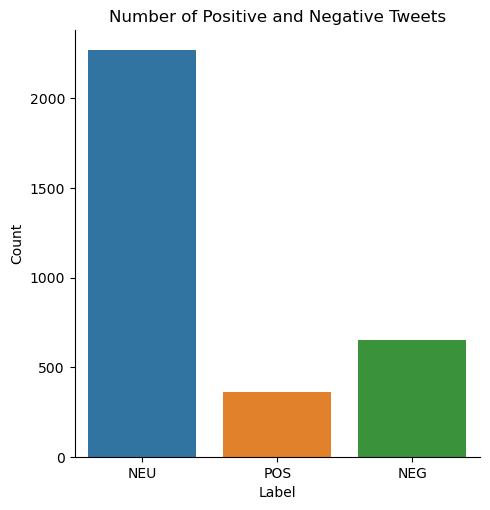

In [52]:
negativeandpositivebarchart = sns.catplot(data=result_df, x='label', kind='count').set(ylabel="Count", xlabel="Label", title="Number of Positive and Negative Tweets")
negativeandpositivebarchart.savefig("negativeandpositivebarchart.png")
negativeandpositivebarchart

## Wordcloud

In [53]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

stopwords = set(STOPWORDS)

In [54]:
# Some settings to make seaborn display better in Jupyter notebook
sns.set(rc={'figure.figsize':(8.2,5.8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [55]:
s5_messages = pd.read_csv("s5_conversations.csv")

C:\Users\samwi\AppData\Local\Temp\ipykernel_21768\1052747395.py:1: DtypeWarning: Columns (26,28,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  s5_messages = pd.read_csv("s5_conversations.csv")


In [56]:
s5_messages['content'] = s5_messages['content'].fillna('')
corpus = s5_messages['content'].tolist()
corpus

['Use this channel to post runs that you would like teams to accomplish. Try to keep discussion to #scire-ooc or #scire-outside.',
 "To be clear, anyone can suggest jobs. Please cross out your job when it's completed.",
 'Objective: Find and disable the AI',
 'Objective: Recover the coffee machine for medical science.',
 '@Runner \nORG GroundCom Objectives\nHIGH RISK OBJECTIVE: Secure the rooftop of SCIRE. (Time Sensitivity: Medium)\nObjective: Scout Lower Floors (Time Sensitivity: High)\nObjective: Capture Organic-Synthetic syntheses and evacuate them for interrogation and study. (Time Sensitivity: High)\nObjective: Secure scouted floors for further infiltration and study. (Time Sensitivity: High)',
 "@Runner \n\nAll-Sovereignty Security Committee Objectives\n\nSecure the AI for extraction to the Sovereignty of Rou'ii for use OR\nHeighten AI Security priviledges for the purposes of causing it to wreak havok on critical league infrastructure and to cause political instability",
 '@Runn

In [57]:
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=0.05, max_df=0.85)
matrix = tfidf.fit_transform(corpus)
matrix_df = pd.DataFrame(matrix.toarray(), columns=tfidf.get_feature_names_out())
matrix_df

,and,be,but,for,have,in,is,it,not,of,on,that,the,this,to,we,with,you
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.266474,0.000000,0.310447,0.873044,0.0,0.0,0.265348
1,0.000000,0.673790,0.000000,0.000000,0.000000,0.000000,0.000000,0.553616,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.489403,0.0,0.0,0.000000
2,0.812554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.582886,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.000000,0.000000,0.848068,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.529887,0.000000,0.000000,0.0,0.0,0.000000
4,0.756139,0.000000,0.000000,0.578748,0.000000,0.000000,0.000000,0.000000,0.0,0.246197,0.000000,0.000000,0.180806,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327781,0.330383,0.054792,0.059481,0.270937,0.056798,0.202375,0.141364,0.225098,0.0,0.414920,0.173547,0.048589,0.643287,0.000000,0.278584,0.0,0.0,0.000000
327782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
327783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
327784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [58]:
matrix_df.sum().sort_values(ascending=False).head(10)

the     50957.199789
to      31672.484938
it      25343.415205
you     22212.459266
is      21443.636751
of      21055.141281
and     19546.355894
that    19154.753907
in      15895.156551
we      15454.036675
dtype: float64

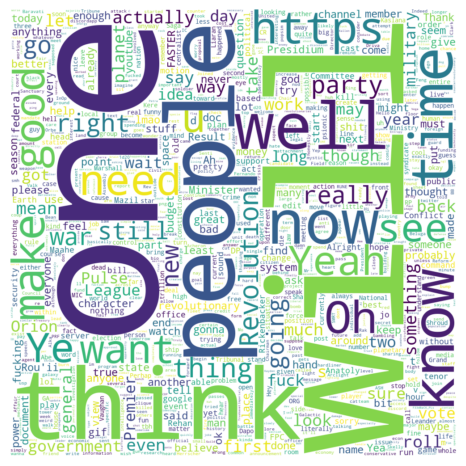

In [59]:
wordcloud = WordCloud(width=1000, height=1000,max_words=1000,collocations=False, background_color='white')
wordcloud.generate(s5_messages['content'].str.cat(sep=' '))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("s5wordcloud.png", dpi=400)
plt.show()

### Positive and negative sentiment wordclouds

For positive and negative sentiments.

In [60]:
sentiment_messages = pd.read_csv("s5_sentiment.csv")

In [61]:
sentiment_messages

,Unnamed: 0,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,...,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl,conversation,community,sentiment,label,score
0,0,8.841468e+17,Default,2021-09-05 18:43:43.093000+00:00,NaN,NaN,False,Use this channel to post runs that you would l...,[],[],...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,"{'label': 'NEU', 'score': 0.8032546043395996}",NEU,0.803255
1,100,8.838289e+17,Default,2021-09-04 21:40:22.486000+00:00,2021-09-04T21:40:56.949+00:00,NaN,False,I've made a bit more of a generalist type,[],[],...,NaN,NaN,NaN,NaN,NaN,9.0,5.0,"{'label': 'NEU', 'score': 0.9380362629890442}",NEU,0.943129
2,200,8.841911e+17,Default,2021-09-05 21:39:56.465000+00:00,NaN,NaN,False,Would that still work?,[],[],...,NaN,NaN,NaN,NaN,NaN,23.0,0.0,"{'label': 'NEU', 'score': 0.960205078125}",NEU,0.965273
3,300,8.844910e+17,Default,2021-09-06 17:31:23.843000+00:00,NaN,NaN,False,Then done forever,[],[],...,NaN,NaN,NaN,NaN,NaN,35.0,5.0,"{'label': 'NEU', 'score': 0.719954252243042}",NEU,0.959912
4,400,8.846186e+17,Default,2021-09-07 01:58:38.021000+00:00,NaN,NaN,False,Go for it,[],[],...,NaN,NaN,NaN,NaN,NaN,44.0,1.0,"{'label': 'POS', 'score': 0.8432368636131287}",NEU,0.964311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,3273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POS,0.937762
6519,3274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POS,0.603901
6520,3275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEG,0.899124
6521,3276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEU,0.649904


In [62]:
negativemessages = sentiment_messages[(sentiment_messages['label'] == "NEG")]
positivemessages = sentiment_messages[(sentiment_messages['label'] == "POS")]

In [63]:
sentiment_messages.columns

Index(['Unnamed: 0', 'id', 'type', 'timestamp', 'timestampEdited',
       'callEndedTimestamp', 'isPinned', 'content', 'attachments', 'embeds',
       'stickers', 'reactions', 'mentions', 'channelName', 'reference',
       'interaction', 'author.id', 'author.name', 'author.discriminator',
       'author.nickname', 'author.color', 'author.isBot', 'author.avatarUrl',
       'reference.messageId', 'reference.channelId', 'reference.guildId',
       'interaction.id', 'interaction.name', 'interaction.user.id',
       'interaction.user.name', 'interaction.user.discriminator',
       'interaction.user.nickname', 'interaction.user.color',
       'interaction.user.isBot', 'interaction.user.avatarUrl', 'conversation',
       'community', 'sentiment', 'label', 'score'],
      dtype='object')

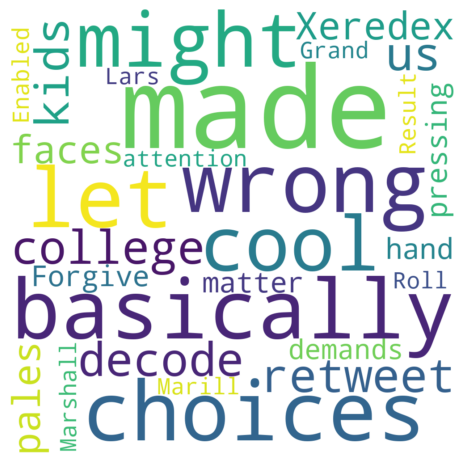

In [64]:
positivewordcloud = WordCloud(width=1000, height=1000,max_words=1000,collocations=False, background_color='white')
positivewordcloud.generate(positivemessages['content'].str.cat(sep=' '))
plt.imshow(positivewordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("positivewordcloud.png", dpi=400)
plt.show()

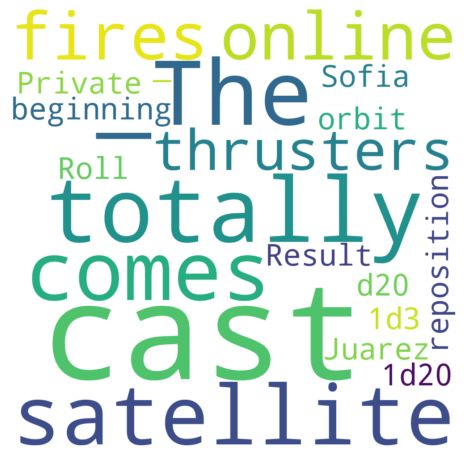

In [65]:
negativewordcloud = WordCloud(width=1000, height=1000,max_words=1000,collocations=False, background_color='white')
negativewordcloud.generate(negativemessages['content'].str.cat(sep=' '))
plt.imshow(negativewordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("negativewordcloud.png", dpi=400)
plt.show()

## Topic Modelling

In [66]:
from bertopic import BERTopic
import plotly.io as pio
pio.renderers.default = "colab"

In [67]:
messages

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,stickers,...,interaction.name,interaction.user.id,interaction.user.name,interaction.user.discriminator,interaction.user.nickname,interaction.user.color,interaction.user.isBot,interaction.user.avatarUrl,conversation,community
0,884146797147226162,Default,2021-09-05 18:43:43.093000+00:00,None,None,False,Use this channel to post runs that you would l...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0
1,884147378163159130,Default,2021-09-05 18:46:01.618000+00:00,2021-09-05T19:05:55.706+00:00,None,False,"To be clear, anyone can suggest jobs. Please c...",[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0
2,884148174267244544,Default,2021-09-05 18:49:11.424000+00:00,None,None,False,Objective: Find and disable the AI,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0
3,884148540287377449,Default,2021-09-05 18:50:38.690000+00:00,None,None,False,Objective: Recover the coffee machine for medi...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5.0
4,884152011350745138,Default,2021-09-05 19:04:26.256000+00:00,None,None,False,@Runner \nORG GroundCom Objectives\nHIGH RISK ...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327781,840638451736772679,Default,2021-05-08 17:17:05.201000+00:00,2021-05-08T18:06:26.886+00:00,None,False,**Notable Features: **\nAlways one of the most...,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18481,3.0
327782,840638569595928576,Default,2021-05-08 17:17:33.301000+00:00,None,None,False,*Pictured: The sun rises over Salta*,[],[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18481,3.0
327783,840638610281332756,Default,2021-05-08 17:17:43.001000+00:00,None,None,False,,"[{'id': '840638607059845130', 'url': 'https://...",[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18481,3.0
327784,870069073793400922,Default,2021-07-28 22:23:52.294000+00:00,None,None,False,https://media.discordapp.net/attachments/83815...,[],"[{'title': '', 'url': 'https://media.discordap...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18482,3.0


In [68]:
from bertopic.representation import MaximalMarginalRelevance
from sklearn.feature_extraction.text import CountVectorizer

def preprocesser(string:str):
    return [word.lower() for word in string.split() if not word.startswith('@')]

cv = CountVectorizer(stop_words='english', tokenizer=preprocesser, ngram_range=(1,3), min_df=0.05, max_df=0.85)

representation_model = MaximalMarginalRelevance(diversity=1.0)
messages_model = BERTopic(vectorizer_model=cv, representation_model=representation_model, nr_topics="auto", embedding_model='all-MiniLM-L12-v2')

In [69]:
result_df[['content']].head(10)

,content
0,Use this channel to post runs that you would l...
100,I've made a bit more of a generalist type
200,Would that still work?
300,Then done forever
400,Go for it
500,Crowbar / Improvised Melee Weapon\nWeight: 4\n...
600,You made basically all of the wrong choices th...
700,It might have been cool for some college kids ...
800,"""But uh.."""
900,((I totally get it


In [70]:
mask = result_df['content'].str.len() >=1
result_df = result_df.loc[mask]
result_df['content'] = result_df['content'].astype('str')

In [71]:
result_df.reset_index(drop=True, inplace=True)

In [72]:
# Here we tell the model that we want it to consider the community assignments when modelling. This is providing guidance to the model that there should be semantic similarity within communities.

topics, probabilities = messages_model.fit_transform(result_df['content'])

In [73]:
messages_model.get_topic_info()

,Topic,Count,Name
0,-1,1523,"-1_it's_make_""i_presidium"
1,0,114,0_*he_*anatoly_sanctuary_push
2,1,110,1_((_i'm_counterrevolutionary_manage
3,2,107,2_stuff_station_did_big
4,3,97,"3_""well_""it_wasn't_try"
5,4,70,4_((i_willing_look_unity
6,5,59,5_crs_fine_party_small
7,6,58,6_rate_thats_playing_smrt
8,7,43,7_yea_mean_makes_know
9,8,42,8_syndicates_doesn't_fuck_look


In [74]:
barchart = messages_model.visualize_barchart(n_words=20,height=400,width=500, top_n_topics=5)

In [75]:
barchart.write_html("s5TopicBarchart.html")

In [76]:
barchart.show()

In [77]:
intertopicMap = messages_model.visualize_topics()
intertopicMap.write_html("s5IntertopicMap.html")
intertopicMap.show()

In [78]:
from umap import UMAP
from sentence_transformers import SentenceTransformer

In [79]:
sentence_model = SentenceTransformer('all-MiniLM-L12-v2')
embeddings = sentence_model.encode(messages['content'].tolist(), show_progress_bar=True)
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

documentmapchart = messages_model.visualize_documents(messages['content'].tolist(), sample=0.25, reduced_embeddings=reduced_embeddings)

Batches:   0%|          | 0/10244 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
documentmapchart.write_html("s5DocumentMapChart.html")

In [ ]:
documentmapchart.show()

In [80]:
from scipy.cluster import hierarchy as sch
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(result_df['content'].tolist(), y=None)

Batches:   0%|          | 0/101 [00:00<?, ?it/s]

2023-06-11 05:14:21,251 - BERTopic - Transformed documents to Embeddings
2023-06-11 05:14:33,681 - BERTopic - Reduced dimensionality
2023-06-11 05:14:33,817 - BERTopic - Clustered reduced embeddings


In [ ]:
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(result_df['content'].tolist(), linkage_function=linkage_function)

In [ ]:
hierarchyClusteringChart = messages_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics, color_threshold=0.25, width=1000, height=2000)

hierarchyClusteringChart.write_html("s5HierarchyClusteringChart.html")

In [ ]:
hierarchyClusteringChart.show()

In [ ]:
heatmap = messages_model.visualize_heatmap()
heatmap.write_html("s5Heatmap.html")
heatmap.show()

## Named Entity Recognition

In [ ]:
import en_core_web_trf

nlp = en_core_web_trf.load()

In [ ]:
def save_displacy_to_html(doc, filename, style='ent'):
    html_data = spacy.displacy.render(doc, style='ent', jupyter=False, page=True)
    with open(filename, 'w+', encoding="utf-8") as f:
        f.write(html_data)

In [ ]:
def entity_extractor(nlp_doc, entity_type=None, allow_duplicates=False):
    if entity_type is None:
        ents = [(ent.text,ent.label_) for ent in nlp_doc.ents]
    else:
        ents = [ent.text for ent in nlp_doc.ents if ent.label_ == entity_type.upper()]
    if not allow_duplicates:
        ents = list(set(ents))
    return ents

In [ ]:
result_df['content'] = result_df['content'].astype(str)

messagesText = nlp.pipe(result_df['content'])

In [ ]:
people = [entity_extractor(content,'person') for content in messagesText]
people

In [ ]:
peopleDF = pd.DataFrame(people)
peopleDF.to_csv('s5PeopleEntities.csv') 

In [ ]:
#peopleDF = pd.read_csv('s5PeopleEntities.csv')
people = peopleDF.values.tolist()

In [ ]:
result_df['people'] = people
result_df['people']

In [ ]:
print(f"****Top 10 People****")
print(messages['people'].value_counts()[:10])
print()

In [ ]:
top_people = people_data.groupby('people',as_index=False).count()
top_people

In [ ]:
toppeoplechart = sns.catplot(data=top_people, y='people',x='communities', kind='bar', height=5, aspect=2).set(xlabel='Freq', ylabel='Person', title='5 Most Mentioned People').set(ylabel="People", xlabel="Mentions", title='5 Most Mentioned People')
toppeoplechart.savefig("toppeoplechart.png")

## Emotional Analysis

In [ ]:
import networkx as nx
import pandas as pd
from transformers import pipeline
import spacy
import plotly.express as px

In [ ]:
get_emotions = pipeline("text-classification", model='j-hartmann/emotion-english-distilroberta-base', top_k=None)

In [ ]:
get_primary_emotion = pipeline("text-classification", model='j-hartmann/emotion-english-distilroberta-base', top_k=1)

In [ ]:
result_df

In [ ]:
# Merging together tweet data and community assignments
result_df = result_df.merge(comms_data,how='left', left_on='author.id', right_index=True)
result_df.shape

In [ ]:
result_df

In [ ]:
result_df['emotions'] = get_emotions(result_df['content'].tolist(), truncation=True)
result_df['primary_emotion'] = get_primary_emotion(result_df['content'].tolist(), truncation=True)
result_df

In [ ]:
label_score = pd.json_normalize(result_df['emotions'])
label_score

In [ ]:
result_df = pd.concat([result_df,label_score], axis=1)
result_df

In [ ]:
result_df = result_df.rename(columns={0:"Fear",1:"Anger",2:"Surprise",3:"Neutral",4:"Sadness",5:"Joy",6:"Disgust"})
result_df.columns

In [ ]:
fear_score = pd.json_normalize(result_df["Fear"])
result_df = pd.concat([result_df,fear_score], axis=1)
result_df = result_df.rename(columns={"label":"Fear Label","score":"Fear Score"})

anger_score = pd.json_normalize(result_df["Anger"])
result_df = pd.concat([result_df,anger_score], axis=1)
result_df = result_df.rename(columns={"label":"Anger Label","score":"Anger Score"})

Surprise_score = pd.json_normalize(result_df["Surprise"])
result_df = pd.concat([result_df,Surprise_score], axis=1)
result_df = result_df.rename(columns={"label":"Surprise Label","score":"Surprise Score"})

Neutral_score = pd.json_normalize(result_df["Neutral"])
result_df = pd.concat([result_df,Neutral_score], axis=1)
result_df = result_df.rename(columns={"label":"Neutral Label","score":"Neutral Score"})

Sadness_score = pd.json_normalize(result_df["Sadness"])
result_df = pd.concat([result_df,Sadness_score], axis=1)
result_df = result_df.rename(columns={"label":"Sadness Label","score":"Sadness Score"})

Joy_score = pd.json_normalize(result_df["Fear"])
result_df = pd.concat([result_df,Joy_score], axis=1)
result_df = result_df.rename(columns={"label":"Joy Label","score":"Joy Score"})

Disgust_score = pd.json_normalize(result_df["Disgust"])
result_df = pd.concat([result_df,Disgust_score], axis=1)
result_df = result_df.rename(columns={"label":"Disgust Label","score":"Disgust Score"})

result_df

In [ ]:
primary_label_score = pd.json_normalize(result_df['primary_emotion'])
primary_label_score

In [ ]:
result_df = pd.concat([result_df,primary_label_score], axis=1)
result_df

In [ ]:
result_df = result_df.rename(columns={0:"Primary Emotion"})
result_df

In [ ]:
primary_emotion_score = pd.json_normalize(result_df["Primary Emotion"])
result_df = pd.concat([result_df,primary_emotion_score], axis=1)
result_df = result_df.rename(columns={"label":"Primary Emotion Label","score":"Primary Emotion Score"})
result_df

In [ ]:
result_df.to_csv("s5_emotion.csv")

In [ ]:
result_df = pd.read_csv('s5_emotion.csv')
result_df

In [ ]:
emotionbarchart = sns.catplot(data=result_df, x='Primary Emotion Label', kind='count').set(title="Count of Messages by Emotion", xlabel="Count", ylabel="Emotion")
emotionbarchart.savefig("emotionbarchart.png")
emotionbarchart

In [ ]:
top_5_communities = result_df['communities'].value_counts().head().index
top_5_communities

In [ ]:
sample = result_df[result_df['communities'].isin(top_5_communities)].copy() # We use .copy to make it a new object rather than a view as we'll probably change this df later
sample

In [ ]:
sample.columns

In [ ]:
pd.crosstab(sample['communities'], sample['Primary Emotion Label'])

In [ ]:
emotioncommunitybarchart = sns.catplot(data=sample, y='communities',hue='Primary Emotion Label', kind='count',order=top_5_communities).set(ylabel="Communities", xlabel="Count", title='Emotion of Messages ordered by Community Tweet frequency')
emotioncommunitybarchart.savefig("emotioncommunitybarchart.png")
emotioncommunitybarchart

In [ ]:
sample.groupby('communities')['Primary Emotion Score'].describe()

In [ ]:
communityemotionscorechart = sns.catplot(data=sample, x='communities', y='Primary Emotion Score',kind='box', hue='Primary Emotion Label', aspect=2,order=top_5_communities).set(ylabel="Emotion Score", xlabel="Communities", title='Communities by Emotion Score')
communityemotionscorechart.savefig("communityemotionscorechart.png")
communityemotionscorechart

In [ ]:
confidence_data = sample[['communities','Primary Emotion Label','Primary Emotion Score']].groupby(['communities','Primary Emotion Label']).mean().unstack()
confidence_data

In [ ]:
sns.heatmap(data=confidence_data, annot=True, linewidths=0.3,  cmap='coolwarm',vmin=0.5, vmax=1)

In [ ]:
heatmapofemotionscorebycommunitychart = sns.heatmap(data=confidence_data, annot=True, linewidths=0.3,  cmap='coolwarm',vmin=0.5, vmax=1)
heatmapofemotionscorebycommunitychart.set(ylabel="Communities", xlabel="Score - Emotion", title='Heatmap of Message Emotion by Communities')
heatmapofemotionscorebycommunitychart = heatmapofemotionscorebycommunitychart.get_figure()
heatmapofemotionscorebycommunitychart.savefig("heatmapofemotionscorebycommunitychart.png")

In [ ]:
heatmapofemotionscorebycommunitychart

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=result_df, row="Primary Emotion Label", hue="Primary Emotion Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Primary Emotion Score",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Primary Emotion Score", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Primary Emotion Score")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [ ]:
g.show()

In [ ]:
g.get_figure()

In [ ]:
g

In [ ]:
result_df.columns

In [ ]:
subset = result_df
subset['created_at'] = pd.to_datetime(subset['created_at'])
subset = subset[(subset['created_at'].dt.year == 2023) & (subset['created_at'].dt.day >= 15)]

In [ ]:
fig = px.scatter(subset, height=1000, x=subset["created_at"], log_y=True, y=subset["public_metrics.like_count"], color=subset["Primary Emotion Label"])
fig.show()

In [ ]:
emotioncounts = [len(result_df[result_df["Primary Emotion Label"] == "fear"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "anger"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "surprise"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "neutral"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "sadness"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "joy"]), 
                 len(result_df[result_df["Primary Emotion Label"] == "disgust"])]
emotioncounts

In [ ]:
colors = []
fig = px.pie(result_df, values=emotioncounts, names=["Fear","Anger","Surprise","Neutral","Sadness","Joy","Disgust"], title='Pie chart of Messages by Emotion', height=750)
fig.update_traces(textposition='inside', textinfo='percent+label+value', marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()